In [1]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import json
from collections import Counter, defaultdict
import matplotlib.pyplot as plt

In [3]:
# Load the log file
log_file = "eve.json"

alerts = []
signature_counter = Counter()
ip_counter = Counter()
alerts_by_sid = defaultdict(list)

In [5]:
with open(log_file, 'r') as f:
    for line in f:
        try:
            entry = json.loads(line)
            print(entry)  # Or access specific keys like entry['event_type']
        except json.JSONDecodeError:
            print("Skipping malformed line")

{'timestamp': '2025-05-09T08:14:09.701406+0000', 'flow_id': 516351909249015, 'in_iface': 'eth0', 'event_type': 'flow', 'src_ip': 'fe80:0000:0000:0000:2838:6cff:fe19:b404', 'dest_ip': 'ff02:0000:0000:0000:0000:0000:0000:0016', 'proto': 'IPv6-ICMP', 'icmp_type': 143, 'icmp_code': 0, 'flow': {'pkts_toserver': 4, 'pkts_toclient': 0, 'bytes_toserver': 440, 'bytes_toclient': 0, 'start': '2025-05-09T08:13:37.251294+0000', 'end': '2025-05-09T08:13:37.791239+0000', 'age': 0, 'state': 'new', 'reason': 'timeout', 'alerted': False}}
{'timestamp': '2025-05-09T09:37:44.660779+0000', 'flow_id': 2019905126042736, 'in_iface': 'eth0', 'event_type': 'flow', 'src_ip': 'fe80:0000:0000:0000:4cce:1cff:fe97:f08f', 'dest_ip': 'ff02:0000:0000:0000:0000:0000:0000:0016', 'proto': 'IPv6-ICMP', 'icmp_type': 143, 'icmp_code': 0, 'flow': {'pkts_toserver': 4, 'pkts_toclient': 0, 'bytes_toserver': 440, 'bytes_toclient': 0, 'start': '2025-05-09T09:37:11.208151+0000', 'end': '2025-05-09T09:37:11.807975+0000', 'age': 0, '

In [6]:
with open(log_file, "r") as f:
    for line in f:
        try:
            entry = json.loads(line)
            if entry.get("event_type") == "alert":
                alert = entry["alert"]
                sid = alert.get("signature_id")
                signature = alert.get("signature")
                src_ip = entry.get("src_ip")
                dest_ip = entry.get("dest_ip")
                timestamp = entry.get("timestamp")

                alerts.append(entry)
                signature_counter[signature] += 1
                ip_counter[src_ip] += 1
                alerts_by_sid[sid].append({
                    "timestamp": timestamp,
                    "src_ip": src_ip,
                    "dest_ip": dest_ip,
                    "signature": signature
                })
        except json.JSONDecodeError:
            continue

In [8]:
# Print summary
print("\n=== Alert Signature Summary ===")
for sig, count in signature_counter.items():
    print(f"{sig}: {count} alert(s)")

print("\n=== Top Source IPs ===")
for ip, count in ip_counter.most_common(5):
    print(f"{ip}: {count} alert(s)")


=== Alert Signature Summary ===

=== Top Source IPs ===


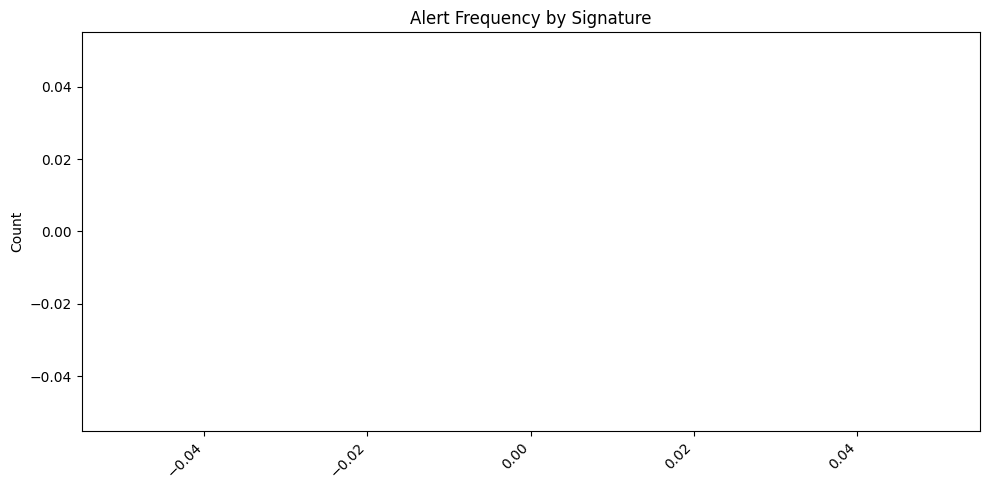

In [9]:
# Optional: visualize alert distribution
plt.figure(figsize=(10, 5))
plt.bar(signature_counter.keys(), signature_counter.values())
plt.title("Alert Frequency by Signature")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()